In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [2]:
base_dir = "C:/Users/Dell/Downloads/Knee_Osteoarthritis_Predictor-main/Knee_Osteoarthritis_Predictor-main/Model_Training/Data"
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

In [2]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras_preprocessing


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [4]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [5]:
 1574 + 737

2311

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [7]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [8]:
from keras.applications import MobileNet
img_width = 224
img_height = 224  # Or any other desired dimensions for MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [9]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [11]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 5)                 250885    
                                                                 
Total params: 3479749 (13.27 MB)
Trainable params: 250885 (980.02 KB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [12]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = classifier.fit(train_data_gen, epochs=20,
validation_data= val_data_gen,)

Epoch 1/20


165/165 [==============================] - 62s 366ms/step - loss: 6.3105 - accuracy: 0.5455 - val_loss: 3.6706 - val_accuracy: 0.7273
Epoch 2/20
165/165 [==============================] - 44s 265ms/step - loss: 2.5830 - accuracy: 0.8006 - val_loss: 1.0953 - val_accuracy: 0.8964
Epoch 3/20
165/165 [==============================] - 44s 266ms/step - loss: 1.2334 - accuracy: 0.8873 - val_loss: 0.7997 - val_accuracy: 0.9248
Epoch 4/20
165/165 [==============================] - 44s 267ms/step - loss: 0.7830 - accuracy: 0.9261 - val_loss: 0.6003 - val_accuracy: 0.9424
Epoch 5/20
165/165 [==============================] - 44s 268ms/step - loss: 0.9989 - accuracy: 0.9212 - val_loss: 0.5407 - val_accuracy: 0.9606
Epoch 6/20
165/165 [==============================] - 49s 300ms/step - loss: 0.5076 - accuracy: 0.9509 - val_loss: 0.3481 - val_accuracy: 0.9733
Epoch 7/20
165/165 [==============================] - 46s 278ms/step - loss: 0.7729 - accuracy: 0.9352 - val_loss: 0.4137 - val_

In [21]:
model_save_loc="D:/final/trained model/MobileNetFinal.h5"
classifier.save(model_save_loc)

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#classifier.save('knee.h5')

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
#pip install Pillow

In [14]:
import numpy as np

In [15]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

165/165 - 22s - 22s/epoch - 132ms/step


In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [19]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[496   4   2   0   1]
 [ 10 473   4   0   1]
 [  0   1 231   0   0]
 [  0   4   1 215   1]
 [  0   0   0   0 206]]
Accuracy: 0.982
Precision: 0.978
Recall: 0.982
F-Measure: 0.982


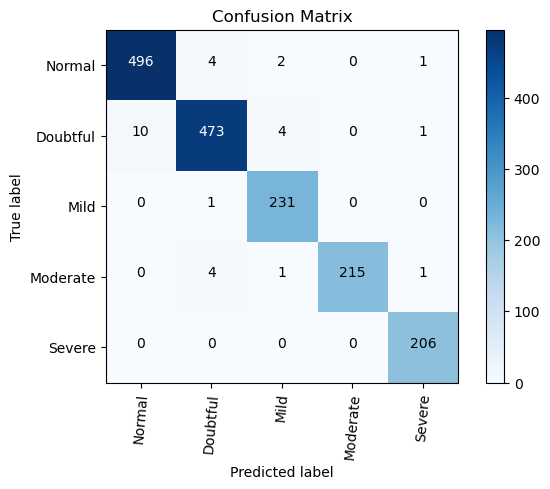

In [20]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred
  

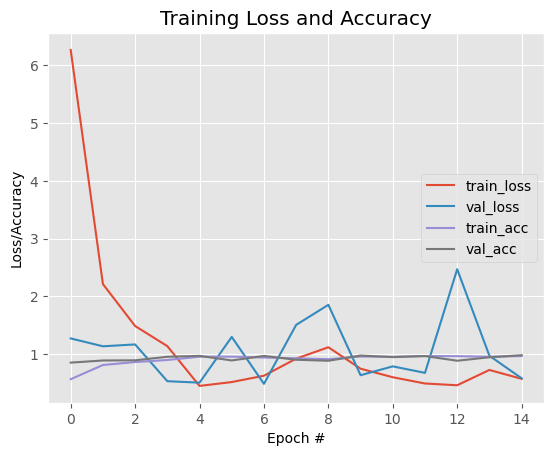

In [28]:
# plot the training loss and accuracy
N = 15 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")